In [1]:
import pandas as pd
import pickle
import math
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
pd.__version__

'2.2.2'

In [4]:
pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 32.6 MB/s eta 0:00:000m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [3]:
#Question 1
len(df_jan.columns) # 19 columns

19

### Computation Duration

In [4]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
df_jan["duration"] = round((df_jan["tpep_dropoff_datetime"]-df_jan["tpep_pickup_datetime"])/pd.Timedelta(minutes=1),2)

In [6]:
# standard deviation of duration
df_jan.duration.std()


42.594353179236194

In [7]:
df_jan.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,3.066766e+06,3066766,3066766,2.995023e+06,3.066766e+06,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06,3.066766e+06
mean,1.730215e+00,2023-01-17 00:22:26.288164,2023-01-17 00:38:06.427874,1.362532e+00,3.847342e+00,1.497440e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01,1.566899e+01
min,1.000000e+00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00,-2.920000e+01
25%,1.000000e+00,2023-01-09 16:21:57.250000,2023-01-09 16:37:06,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00,7.120000e+00
50%,2.000000e+00,2023-01-17 08:42:29.500000,2023-01-17 08:58:30.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00,1.152000e+01
75%,2.000000e+00,2023-01-24 16:26:27,2023-01-24 16:42:49,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00,1.830000e+01
max,2.000000e+00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00,1.002918e+04
std,4.438480e-01,NaN,NaN,8.961200e-01,2.495838e+02,6.474767e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.718454e-01,3.556511e-01,4.259435e+01


<Axes: >

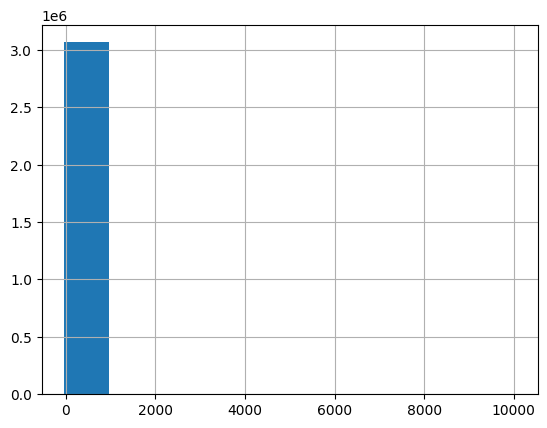

In [8]:
# Checking the distribution of trip duration
(df_jan["duration"]).hist()

### Removing outliers

In [9]:
mask = (df_jan["duration"]>=1) & (df_jan["duration"]<=60)

In [10]:
df = df_jan[mask]

In [11]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,3.009173e+06,3009173,3009173,2.938068e+06,3.009173e+06,2.938068e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,2.938068e+06,2.938068e+06,3.009173e+06
mean,1.729855e+00,2023-01-17 00:34:19.090805,2023-01-17 00:48:31.382655,1.361619e+00,3.783685e+00,1.423694e+00,1.666243e+02,1.645131e+02,1.184650e+00,1.789434e+01,1.546403e+00,4.912155e-01,3.327611e+00,4.886258e-01,9.851232e-01,2.650305e+01,2.294732e+00,1.029695e-01,1.420486e+01
min,1.000000e+00,2022-10-25 00:42:10,2022-10-25 00:44:22,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-5.800000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-5.835000e+02,-2.500000e+00,-1.250000e+00,1.000000e+00
25%,1.000000e+00,2023-01-09 16:26:19,2023-01-09 16:40:24,1.000000e+00,1.090000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.545000e+01,2.500000e+00,0.000000e+00,7.220000e+00
50%,2.000000e+00,2023-01-17 08:45:30,2023-01-17 08:59:46,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.740000e+00,0.000000e+00,1.000000e+00,2.013000e+01,2.500000e+00,0.000000e+00,1.155000e+01
75%,2.000000e+00,2023-01-24 16:33:29,2023-01-24 16:48:53,1.000000e+00,3.300000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.980000e+01,2.500000e+00,5.000000e-01,4.140000e+00,0.000000e+00,1.000000e+00,2.830000e+01,2.500000e+00,0.000000e+00,1.818000e+01
max,2.000000e+00,2023-02-01 00:56:53,2023-02-01 01:06:43,8.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,9.990000e+02,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.000000e+03,2.500000e+00,1.250000e+00,6.000000e+01
std,4.440346e-01,NaN,NaN,8.954235e-01,2.519560e+02,6.051629e+00,6.424609e+01,6.989129e+01,5.129361e-01,1.621241e+01,1.783131e+00,9.314787e-02,3.645204e+00,1.934030e+00,1.669544e-01,2.053547e+01,7.377791e-01,3.480707e-01,9.939385e+00


<Axes: >

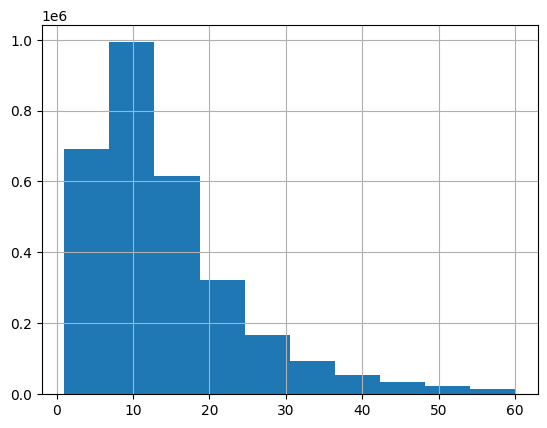

In [12]:
df["duration"].hist()

In [13]:
len(df)/len(df_jan)*100

98.1220282212598

*The remaining portion of the data after trimming is 98%*

### OneHotEncoding
normalizing the dataset

In [15]:
X = df[["PULocationID","DOLocationID"]].astype("str")

In [16]:
X_dict = X.to_dict(orient='records')

In [17]:
dv = DictVectorizer()

In [18]:
X_train = dv.fit_transform(X_dict)
X_train.get_shape()

(3009173, 515)

### Train a Linear model

In [19]:
target = "duration"
y_train = df[target].values # returns an array type

In [20]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
y_pred[:10]

array([11.5273081 , 10.89780464, 11.32567756, 27.91593084, 11.70307058,
       11.15631481, 11.31006852, 23.39715269, 10.97940489,  9.37245018])

In [22]:
with open("lin_reg.bin", 'wb') as f_out:
	pickle.dump((dv,model), f_out)

In [23]:
mean_squared_error(y_train,y_pred, squared=False)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.649262115608829

### Validation set

In [24]:
def prep_data(df):
    # Calculate duration
    df["duration"] = round((df_jan["tpep_dropoff_datetime"]-df_jan["tpep_pickup_datetime"])/pd.Timedelta(minutes=1),2)
    # trimm the data
    mask = (df["duration"]>=1) & (df["duration"]<=60)
    df = df[mask]
    #subset to needed columns
    X = df[["PULocationID","DOLocationID"]].astype("str")
    # converting X to list of dict
    X_dict = X.to_dict(orient='records')
    # apply one hot encoding
    #Dv = DictVectorizer()
    # fit the vectorizer
    #vectorized_x = Dv.transform(X_dict)
    return X_dict

In [30]:
def masked_data(df):
    # Calculate duration
    df["duration"] = round((df_jan["tpep_dropoff_datetime"]-df_jan["tpep_pickup_datetime"])/pd.Timedelta(minutes=1),2)
    # trimm the data
    mask = (df["duration"]>=1) & (df["duration"]<=60)
    df = df[mask]
    
    return df
    
df2 = masked_data(df_feb)
y_val = df2["duration"].values

In [25]:
# dict of validation set
val_ = prep_data(df_feb)

In [26]:
# transform validation set only with train set vectorizer
X_val = dv.transform(val_)

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

y_val_pred = model.predict(X_val)

In [32]:
# RMSE
mean_squared_error(y_val,y_val_pred, squared=False)

11.8733667694628

### Predictions Viz

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


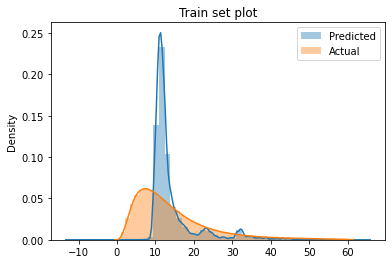

In [37]:
sns.distplot(y_pred, label="Predicted")
sns.distplot(y_train, label="Actual")
plt.title("Train set plot")
plt.legend()

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


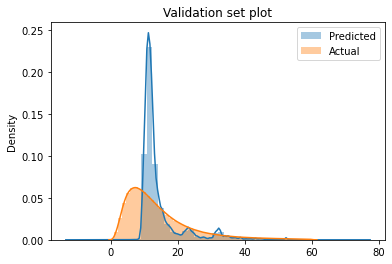

In [36]:
# for validation set
sns.distplot(y_val_pred, label="Predicted")
sns.distplot(y_val, label="Actual")
plt.title("Validation set plot")
plt.legend();